Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tf2onnx

import joblib
import os

2025-06-02 21:29:28.644371: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 21:29:28.647783: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 21:29:28.657403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748874568.672623  232737 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748874568.677148  232737 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748874568.689210  232737 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Loading Data

In [2]:
df = pd.read_csv('/dataset/cardiovascular_data.csv')
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio  70000 non-null  object
dtypes: object(1)
memory usage: 547.0+ KB


In [4]:
# Baca file dengan delimiter yang benar agar kolom nya terpisah
df = pd.read_csv('/dataset/cardiovascular_data.csv', sep=';')

# Cek apakah kolom sudah terpisah
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


EDA

In [6]:
# Basic statistic
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
# Target variable distribution
print(f"\nTarget Variable Distribution:")
target_counts = df['cardio'].value_counts()
print(target_counts)
print(f"Percentage - No Disease: {target_counts[0]/len(df)*100:.1f}%")
print(f"Percentage - Disease: {target_counts[1]/len(df)*100:.1f}%")


Target Variable Distribution:
cardio
0    35021
1    34979
Name: count, dtype: int64
Percentage - No Disease: 50.0%
Percentage - Disease: 50.0%


Text(0.5, 1.0, 'Disease Distribution')

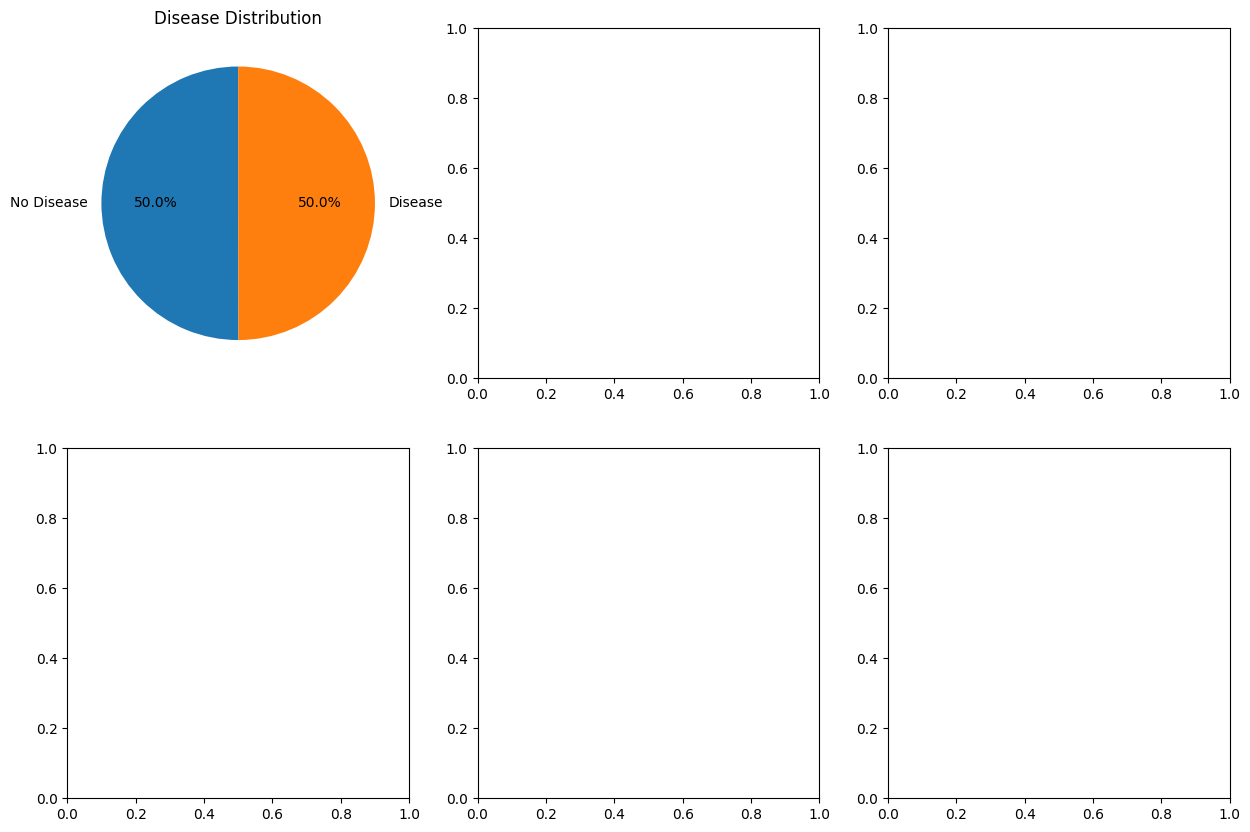

In [9]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Target distribution
axes[0,0].pie(target_counts.values, labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Disease Distribution')

In [10]:
# Age distribution by disease
sns.boxplot(data=df, x='cardio', y='age', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Disease Status')
axes[0,1].set_xlabel('Disease (0: No, 1: Yes)')

Text(0.5, 424.44444444444446, 'Disease (0: No, 1: Yes)')

In [11]:
# Blood pressure analysis
df['bmi'] = df['weight'] / (df['height']/100)**2
sns.scatterplot(data=df, x='ap_hi', y='ap_lo', hue='cardio', alpha=0.6, ax=axes[0,2])
axes[0,2].set_title('Blood Pressure Distribution')
axes[0,2].set_xlabel('Systolic BP')
axes[0,2].set_ylabel('Diastolic BP')

Text(850.545684822597, 0.5, 'Diastolic BP')

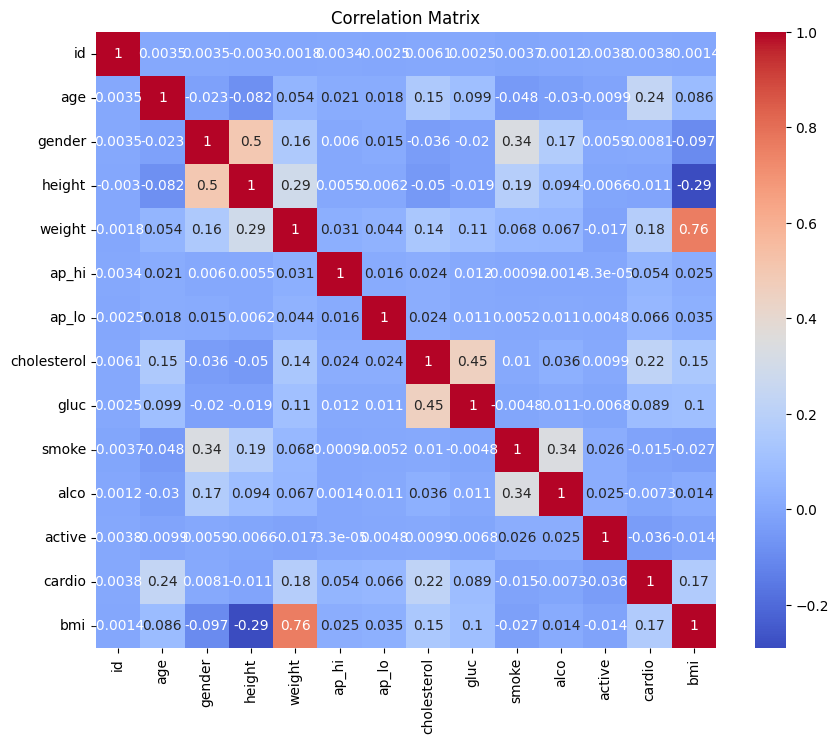

In [12]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

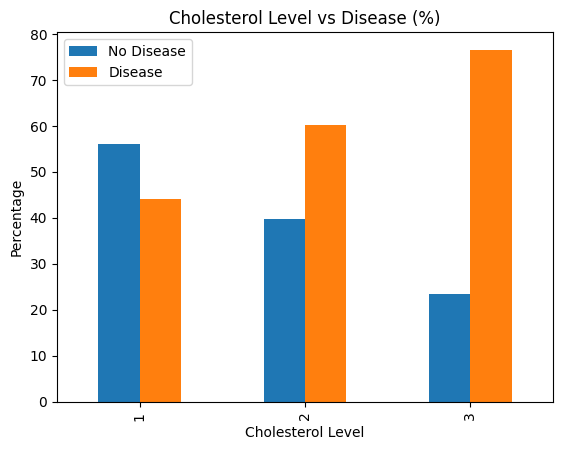

In [13]:
# Cholesterol vs Disease
cholesterol_disease_counts = df.groupby('cholesterol')['cardio'].value_counts().unstack(fill_value=0)
cholesterol_percentage = cholesterol_disease_counts.apply(lambda x: x / x.sum() * 100, axis=1)
cholesterol_percentage.plot(kind='bar')
plt.title('Cholesterol Level vs Disease (%)')
plt.xlabel('Cholesterol Level')
plt.ylabel('Percentage')
plt.legend(['No Disease', 'Disease'])
plt.show()

DATA PREPROCESSING

In [14]:
# Remove outliers (simple method)
def remove_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Clean the data
print("Removing outliers.")
original_shape = df.shape[0]

# Remove extreme outliers for blood pressure and BMI
df = remove_outliers(df, 'ap_hi', 0.01, 0.99)
df = remove_outliers(df, 'ap_lo', 0.01, 0.99)
df = remove_outliers(df, 'bmi', 0.01, 0.99)

print(f"Removed {original_shape - df.shape[0]} outliers")
print(f"Cleaned dataset shape: {df.shape}")

Removing outliers.
Removed 2443 outliers
Cleaned dataset shape: (67557, 14)


In [15]:
# Prepare features and target
print("Preparing features and target.")
# Drop both 'cardio' (target) and 'id' (identifier)
X = df.drop(['cardio', 'id'], axis=1)
y = df['cardio']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Preparing features and target.
Features shape: (67557, 12)
Target shape: (67557,)


In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (54045, 12)
Test set: (13512, 12)


In [17]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


NEURAL NETWORK MODEL

In [18]:
# Build the model
def create_nn_model(input_dim):
    # Use tf.keras instead of keras
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )

    return model

In [19]:
# Create and display model
# The input dimension will now be 12 (13 original - 1 'id')
model = create_nn_model(X_train_scaled.shape[1])
print("Neural Network Architecture:")
model.summary()

# Add callbacks - Use tf.keras.callbacks instead of keras.callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train the model
print("Training the model.")
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

print("Model training completed!")

Neural Network Architecture:


/home/arch/.anaconda3/envs/main-ds/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-02 21:29:32.063457: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,545 (49.00 KB)

 Trainable params: 12,545 (49.00 KB)

 Non-trainable params: 0 (0.00 B)

Training the model.
Epoch 1/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7049 - loss: 0.5828 - precision: 0.7047 - recall: 0.7017 - val_accuracy: 0.7215 - val_loss: 0.5589 - val_precision: 0.7490 - val_recall: 0.6651 - learning_rate: 0.0010
Epoch 2/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7304 - loss: 0.5517 - precision: 0.7440 - recall: 0.7016 - val_accuracy: 0.7262 - val_loss: 0.5554 - val_precision: 0.7479 - val_recall: 0.6811 - learning_rate: 0.0010
Epoch 3/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7270 - loss: 0.5533 - precision: 0.7519 - recall: 0.6746 - val_accuracy: 0.7275 - val_loss: 0.5543 - val_precision: 0.7525 - val_recall: 0.6768 - learning_rate: 0.0010
Epoch 4/100
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7308 - loss: 0.5501 - precision: 0.7493 - recall: 0.6903 - val_accuracy: 0.7252 - val_loss: 0.5542 - val_precision: 0.7624 - val_recall: 0.6531 - learning_rate: 0.0010
Epoch 5/100
1352/1352 ━━━━━━━━━━

MODEL EVALUATION

In [20]:
# Make predictions
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Calculate metrics - Need to import accuracy_score and roc_auc_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"AUC Score: {auc_score:.4f}")

print(f"Classification Report:")
print(classification_report(y_test, y_pred))

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
Test Accuracy: 0.7340
AUC Score: 0.8011
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6781
           1       0.75      0.69      0.72      6731

    accuracy                           0.73     13512
   macro avg       0.74      0.73      0.73     13512
weighted avg       0.74      0.73      0.73     13512



In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
print(cm)

Confusion Matrix:
[[5268 1513]
 [2081 4650]]


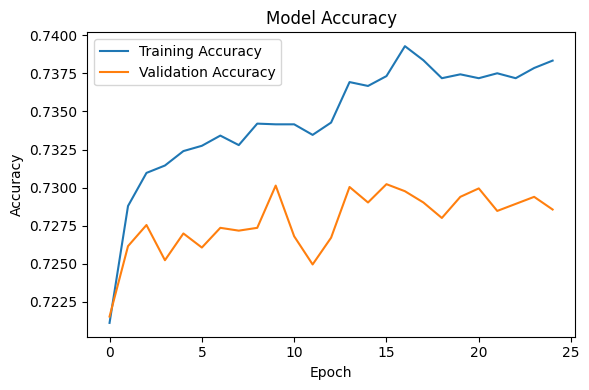

In [22]:
# Training history
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history.history['accuracy'], label='Training Accuracy')
ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend()

plt.tight_layout()
plt.show()

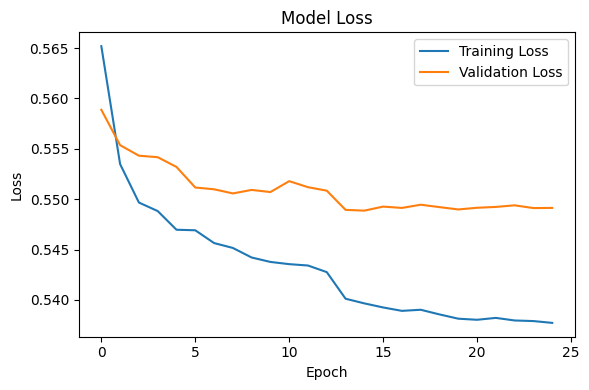

In [23]:
# Loss history
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_title('Model Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()

plt.tight_layout()
plt.show()

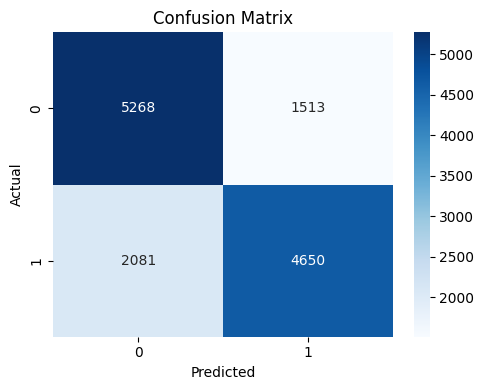

In [24]:
# Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()

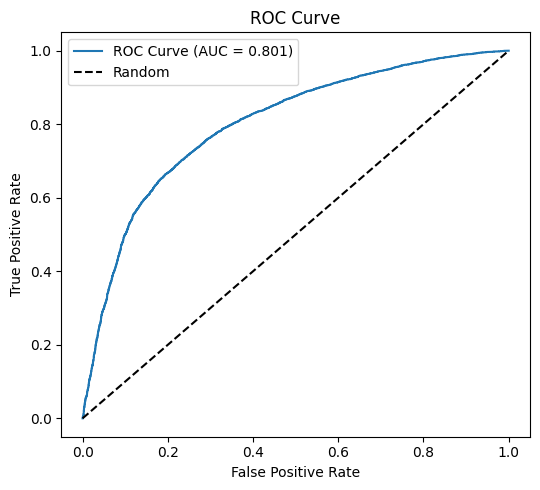

In [25]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(5.5, 5))

ax.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

plt.tight_layout()
plt.show()

Inferensi

In [26]:
# Sample prediction function
def predict_cardiovascular_disease(age, gender, height, weight, ap_hi, ap_lo,
                                 cholesterol, gluc, smoke, alco, active):
    """
    Predict cardiovascular disease probability

    Parameters:
    - age: Age in years
    - gender: 0 for female, 1 for male
    - height: Height in cm
    - weight: Weight in kg
    - ap_hi: Systolic blood pressure
    - ap_lo: Diastolic blood pressure
    - cholesterol: 1=normal, 2=above normal, 3=well above normal
    - gluc: 1=normal, 2=above normal, 3=well above normal
    - smoke: 0=no, 1=yes
    - alco: 0=no, 1=yes
    - active: 0=no, 1=yes
    """

    # Create BMI
    bmi = weight / (height/100)**2

    # Prepare input as a dictionary first to ensure column order matches training data
    # The columns should match X after dropping 'id':
    # 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi'
    input_dict = {
        'age': age,
        'gender': gender,
        'height': height,
        'weight': weight,
        'ap_hi': ap_hi,
        'ap_lo': ap_lo,
        'cholesterol': cholesterol,
        'gluc': gluc,
        'smoke': smoke,
        'alco': alco,
        'active': active,
        'bmi': bmi
    }

    # Convert the dictionary to a Pandas DataFrame row
    input_df = pd.DataFrame([input_dict])

    # Scale the input
    # Use the scaler trained on data without the 'id' column
    input_scaled = scaler.transform(input_df)

    # Make prediction
    probability = model.predict(input_scaled)[0][0]
    prediction = "High Risk" if probability > 0.5 else "Low Risk"

    return {
        'probability': float(probability),
        'prediction': prediction,
        'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low'
    }

# Test the prediction function
print("SAMPLE PREDICTION")
print("-"*25)

sample_result = predict_cardiovascular_disease(
    age=55, gender=1, height=175, weight=80,
    ap_hi=140, ap_lo=90, cholesterol=2, gluc=1,
    smoke=1, alco=0, active=1
)

print(f"Sample Patient Profile:")
print(f"- Age: 55, Male, Height: 175cm, Weight: 80kg")
print(f"- Blood Pressure: 140/90, Cholesterol: Above Normal")
print(f"- Smoker: Yes, Alcohol: No, Active: Yes")
print(f"\nPrediction Results:")
print(f"- Probability: {sample_result['probability']:.1%}")
print(f"- Prediction: {sample_result['prediction']}")
print(f"- Risk Level: {sample_result['risk_level']}")

SAMPLE PREDICTION
-------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Sample Patient Profile:
- Age: 55, Male, Height: 175cm, Weight: 80kg
- Blood Pressure: 140/90, Cholesterol: Above Normal
- Smoker: Yes, Alcohol: No, Active: Yes

Prediction Results:
- Probability: 89.2%
- Prediction: High Risk
- Risk Level: High


Simpan Model

In [27]:
saved_model_dir = 'saved_model_cardiovascular'
os.makedirs(saved_model_dir, exist_ok=True)

# Simpan model Keras
model_path = os.path.join(saved_model_dir, 'cardiovascular_model.keras')
model.save(model_path)
print(f"Model Keras disimpan di: {model_path}")

# Simpan scaler
# Pastikan 'scaler' adalah objek StandardScaler yang telah di-fit pada data training
scaler_path = os.path.join(saved_model_dir, 'cardiovascular_scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"Scaler disimpan di: {scaler_path}")

print("Model kardiovaskular dan scaler telah disimpan.")

Model Keras disimpan di: saved_model_cardiovascular/cardiovascular_model.keras
Scaler disimpan di: saved_model_cardiovascular/cardiovascular_scaler.pkl
Model kardiovaskular dan scaler telah disimpan.
